In [1]:
import pandas as pd
import numpy as np


### Read the dataset

In [36]:
#This dataset contains flight delay information from 2023/01/01-2023/08/31
file_path = "/Users/lixingchen/Downloads/2023.csv"
df = pd.read_csv(file_path)
df.head()

,FL_DATE,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,...,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FL_YEAR,FL_MONTH,FL_DAY
0,2023-06-04,9E,20363,4628,DSM,"Des Moines, IA",LGA,"New York, NY",1033,1053.0,...,134.0,1031.0,20.0,0.0,4.0,0.0,0.0,2023,6,4
1,2023-06-01,9E,20363,4628,ROC,"Rochester, NY",LGA,"New York, NY",1001,956.0,...,49.0,254.0,NaN,NaN,NaN,NaN,NaN,2023,6,1
2,2023-06-02,9E,20363,4628,ROC,"Rochester, NY",LGA,"New York, NY",1001,956.0,...,46.0,254.0,NaN,NaN,NaN,NaN,NaN,2023,6,2
3,2023-06-01,9E,20363,4629,ITH,"Ithaca/Cortland, NY",JFK,"New York, NY",1452,1447.0,...,46.0,189.0,NaN,NaN,NaN,NaN,NaN,2023,6,1
4,2023-06-02,9E,20363,4629,ITH,"Ithaca/Cortland, NY",JFK,"New York, NY",1452,1448.0,...,46.0,189.0,NaN,NaN,NaN,NaN,NaN,2023,6,2


In [3]:
#This dataset contains airline codes and their corresponding airline names
path = "/Users/lixingchen/Downloads/archive/AIRLINE_CODE_DICTIONARY.csv"
airline_code = pd.read_csv(path)
airline_code.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


### Data Cleaning and Preprocessing

In [4]:
#Merging the two datasets together by its airline codes
df = df.merge(airline_code, how = 'left', left_on = 'AIRLINE_CODE', right_on = 'Code')
df = df.drop(columns=['AIRLINE_CODE', 'Code'])
df = df.rename(columns={'Description': 'Airline'})
df

,FL_DATE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FL_YEAR,FL_MONTH,FL_DAY,Airline
0,2023-06-04,20363,4628,DSM,"Des Moines, IA",LGA,"New York, NY",1033,1053.0,20.0,...,1031.0,20.0,0.0,4.0,0.0,0.0,2023,6,4,Endeavor Air Inc.
1,2023-06-01,20363,4628,ROC,"Rochester, NY",LGA,"New York, NY",1001,956.0,-5.0,...,254.0,NaN,NaN,NaN,NaN,NaN,2023,6,1,Endeavor Air Inc.
2,2023-06-02,20363,4628,ROC,"Rochester, NY",LGA,"New York, NY",1001,956.0,-5.0,...,254.0,NaN,NaN,NaN,NaN,NaN,2023,6,2,Endeavor Air Inc.
3,2023-06-01,20363,4629,ITH,"Ithaca/Cortland, NY",JFK,"New York, NY",1452,1447.0,-5.0,...,189.0,NaN,NaN,NaN,NaN,NaN,2023,6,1,Endeavor Air Inc.
4,2023-06-02,20363,4629,ITH,"Ithaca/Cortland, NY",JFK,"New York, NY",1452,1448.0,-4.0,...,189.0,NaN,NaN,NaN,NaN,NaN,2023,6,2,Endeavor Air Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545417,2023-08-01,20452,3406,EWR,"Newark, NJ",AVL,"Asheville, NC",2000,1954.0,-6.0,...,583.0,NaN,NaN,NaN,NaN,NaN,2023,8,1,Republic Airline
4545418,2023-08-01,20452,3405,EWR,"Newark, NJ",SDF,"Louisville, KY",1657,1650.0,-7.0,...,642.0,NaN,NaN,NaN,NaN,NaN,2023,8,1,Republic Airline
4545419,2023-08-01,20452,3404,EWR,"Newark, NJ",DTW,"Detroit, MI",1359,1404.0,5.0,...,488.0,0.0,0.0,50.0,0.0,0.0,2023,8,1,Republic Airline
4545420,2023-08-01,20452,3403,CHS,"Charleston, SC",IAD,"Washington, DC",1450,1442.0,-8.0,...,441.0,NaN,NaN,NaN,NaN,NaN,2023,8,1,Republic Airline


In [5]:
#Converting the date into Datetime format
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], format='%Y-%m-%d')

In [6]:
df.columns

Index(['FL_DATE', 'DOT_CODE', 'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST',
       'DEST_CITY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
       'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'FL_YEAR', 'FL_MONTH',
       'FL_DAY', 'Airline'],
      dtype='object')

In [7]:
#Dropping irrelavant columns
columns_to_drop = ['DOT_CODE', 'FL_NUMBER', 'DEST_CITY','TAXI_OUT',
                   'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN','CANCELLED', 'CANCELLATION_CODE', 
                   'DIVERTED', 'AIR_TIME', 'DISTANCE','DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 
                   'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 
                   'FL_YEAR', 'FL_MONTH', 'FL_DAY']
df.drop(columns=columns_to_drop, inplace = True)

In [8]:
#Renaming and reordering the columns for better readability
new_column_names = {'FL_DATE': 'Date', 'ORIGIN':'Origin','DEST':'Destination', 'ORIGIN_CITY': 'Origin_City', 
                    'CRS_DEP_TIME': 'Scheduled_Departure','DEP_TIME': 'Departure_Time',
                    'DEP_DELAY':'Departure_Delay','CRS_ARR_TIME':'Scheduled_Arrival',
                    'ARR_TIME':'Arrival_Time', 'ARR_DELAY':'Arrival_Delay',
                    'CRS_ELAPSED_TIME':'Schedule_Time','ELAPSED_TIME':'Elapsed_Time'}
df = df.rename(columns=new_column_names)
df = df[['Date', 'Airline', 'Origin', 'Origin_City', 'Destination', 'Scheduled_Departure',
       'Departure_Time', 'Departure_Delay', 'Scheduled_Arrival',
       'Arrival_Time', 'Arrival_Delay', 'Schedule_Time', 'Elapsed_Time']]
df

,Date,Airline,Origin,Origin_City,Destination,Scheduled_Departure,Departure_Time,Departure_Delay,Scheduled_Arrival,Arrival_Time,Arrival_Delay,Schedule_Time,Elapsed_Time
0,2023-06-04,Endeavor Air Inc.,DSM,"Des Moines, IA",LGA,1033,1053.0,20.0,1415,1439.0,24.0,162.0,166.0
1,2023-06-01,Endeavor Air Inc.,ROC,"Rochester, NY",LGA,1001,956.0,-5.0,1119,1116.0,-3.0,78.0,80.0
2,2023-06-02,Endeavor Air Inc.,ROC,"Rochester, NY",LGA,1001,956.0,-5.0,1119,1102.0,-17.0,78.0,66.0
3,2023-06-01,Endeavor Air Inc.,ITH,"Ithaca/Cortland, NY",JFK,1452,1447.0,-5.0,1559,1556.0,-3.0,67.0,69.0
4,2023-06-02,Endeavor Air Inc.,ITH,"Ithaca/Cortland, NY",JFK,1452,1448.0,-4.0,1559,1554.0,-5.0,67.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545417,2023-08-01,Republic Airline,EWR,"Newark, NJ",AVL,2000,1954.0,-6.0,2216,2147.0,-29.0,136.0,113.0
4545418,2023-08-01,Republic Airline,EWR,"Newark, NJ",SDF,1657,1650.0,-7.0,1922,1853.0,-29.0,145.0,123.0
4545419,2023-08-01,Republic Airline,EWR,"Newark, NJ",DTW,1359,1404.0,5.0,1558,1648.0,50.0,119.0,164.0
4545420,2023-08-01,Republic Airline,CHS,"Charleston, SC",IAD,1450,1442.0,-8.0,1625,1618.0,-7.0,95.0,96.0


In [9]:
#Sort the Dataframe by date in ascending order
df.sort_values(by = 'Date', inplace = True)
df.reset_index(drop = True, inplace = True)
df

,Date,Airline,Origin,Origin_City,Destination,Scheduled_Departure,Departure_Time,Departure_Delay,Scheduled_Arrival,Arrival_Time,Arrival_Delay,Schedule_Time,Elapsed_Time
0,2023-01-01,United Air Lines Inc.,EWR,"Newark, NJ",ORD,859,904.0,5.0,1048,1046.0,-2.0,169.0,162.0
1,2023-01-01,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX",MIA,1040,1045.0,5.0,1431,1423.0,-8.0,171.0,158.0
2,2023-01-01,Southwest Airlines Co.,MDW,"Chicago, IL",DEN,1525,1556.0,31.0,1710,1740.0,30.0,165.0,164.0
3,2023-01-01,Southwest Airlines Co.,MDW,"Chicago, IL",DEN,1800,1840.0,40.0,1945,2012.0,27.0,165.0,152.0
4,2023-01-01,American Airlines Inc.,ATL,"Atlanta, GA",PHL,730,721.0,-9.0,932,910.0,-22.0,122.0,109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545417,2023-08-31,Allegiant Air,MFE,"Mission/McAllen/Edinburg, TX",LAS,1353,1358.0,5.0,1453,1455.0,2.0,180.0,177.0
4545418,2023-08-31,Allegiant Air,SNA,"Santa Ana, CA",GEG,1326,1413.0,47.0,1556,1641.0,45.0,150.0,148.0
4545419,2023-08-31,Allegiant Air,LAS,"Las Vegas, NV",FSD,1717,1706.0,-11.0,2203,2156.0,-7.0,166.0,170.0
4545420,2023-08-31,Allegiant Air,GRI,"Grand Island, NE",LAS,2314,1312.0,838.0,2344,1355.0,851.0,150.0,163.0


In [10]:
#check for null values in data frame, since we have a big dataset, we decided to drop the null entries for better ananlysis
df.isna().sum()

Date                       0
Airline                    0
Origin                     0
Origin_City                0
Destination                0
Scheduled_Departure        0
Departure_Time         72890
Departure_Delay        72920
Scheduled_Arrival          0
Arrival_Time           76876
Arrival_Delay          88263
Schedule_Time              5
Elapsed_Time           88263
dtype: int64

In [11]:
df = df.dropna()
df

,Date,Airline,Origin,Origin_City,Destination,Scheduled_Departure,Departure_Time,Departure_Delay,Scheduled_Arrival,Arrival_Time,Arrival_Delay,Schedule_Time,Elapsed_Time
0,2023-01-01,United Air Lines Inc.,EWR,"Newark, NJ",ORD,859,904.0,5.0,1048,1046.0,-2.0,169.0,162.0
1,2023-01-01,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX",MIA,1040,1045.0,5.0,1431,1423.0,-8.0,171.0,158.0
2,2023-01-01,Southwest Airlines Co.,MDW,"Chicago, IL",DEN,1525,1556.0,31.0,1710,1740.0,30.0,165.0,164.0
3,2023-01-01,Southwest Airlines Co.,MDW,"Chicago, IL",DEN,1800,1840.0,40.0,1945,2012.0,27.0,165.0,152.0
4,2023-01-01,American Airlines Inc.,ATL,"Atlanta, GA",PHL,730,721.0,-9.0,932,910.0,-22.0,122.0,109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545417,2023-08-31,Allegiant Air,MFE,"Mission/McAllen/Edinburg, TX",LAS,1353,1358.0,5.0,1453,1455.0,2.0,180.0,177.0
4545418,2023-08-31,Allegiant Air,SNA,"Santa Ana, CA",GEG,1326,1413.0,47.0,1556,1641.0,45.0,150.0,148.0
4545419,2023-08-31,Allegiant Air,LAS,"Las Vegas, NV",FSD,1717,1706.0,-11.0,2203,2156.0,-7.0,166.0,170.0
4545420,2023-08-31,Allegiant Air,GRI,"Grand Island, NE",LAS,2314,1312.0,838.0,2344,1355.0,851.0,150.0,163.0


### Exploratory Data Analysis

### Which airline has the greatest/least average departure delay time?

In [12]:
# Check all airline names
unique_airlines = df['Airline'].unique()
print("Unique airlines in the dataset:")
print(unique_airlines)


Unique airlines in the dataset:
['United Air Lines Inc.' 'American Airlines Inc.' 'Southwest Airlines Co.'
 'Spirit Air Lines' 'Delta Air Lines Inc.' 'Republic Airline'
 'SkyWest Airlines Inc.' 'JetBlue Airways' 'Endeavor Air Inc.' 'Envoy Air'
 'Alaska Airlines Inc.' 'Allegiant Air' 'PSA Airlines Inc.'
 'Frontier Airlines Inc.' 'Hawaiian Airlines Inc.']


In [13]:
# Calculate the average departure delay for each airline
average_delay_by_airline = df.groupby('Airline')['Departure_Delay'].mean()

# Sort the airlines by average delay time to get the ranking from greatest to least
ranked_airlines_by_delay = average_delay_by_airline.sort_values(ascending=False)

# Display the airline with the greatest average delay time
greatest_delay_airline = ranked_airlines_by_delay.idxmax()
greatest_delay_time = ranked_airlines_by_delay.max()
print(f"Airline with the greatest average departure delay time: {greatest_delay_airline} with an average of {greatest_delay_time:.2f} minutes.")

# Display the airline with the least average delay time
least_delay_airline = ranked_airlines_by_delay.idxmin()
least_delay_time = ranked_airlines_by_delay.min()
print(f"Airline with the least average departure delay time: {least_delay_airline} with an average of {least_delay_time:.2f} minutes.")

Airline with the greatest average departure delay time: Frontier Airlines Inc. with an average of 26.57 minutes.
Airline with the least average departure delay time: Republic Airline with an average of 4.33 minutes.


### Ranking

In [14]:
# Display the ranking of airlines from greatest to least average delay time
print("\nRanking of airlines from greatest to least average departure delay time:")
print(ranked_airlines_by_delay)


Ranking of airlines from greatest to least average departure delay time:
Airline
Frontier Airlines Inc.    26.570358
JetBlue Airways           25.787604
Spirit Air Lines          22.510868
American Airlines Inc.    20.645060
Allegiant Air             17.732353
United Air Lines Inc.     15.977547
Southwest Airlines Co.    13.137536
Delta Air Lines Inc.      13.031542
Hawaiian Airlines Inc.    11.750624
SkyWest Airlines Inc.      9.296513
Endeavor Air Inc.          8.531367
PSA Airlines Inc.          8.245741
Envoy Air                  8.079303
Alaska Airlines Inc.       6.980155
Republic Airline           4.332386
Name: Departure_Delay, dtype: float64


### Visualization

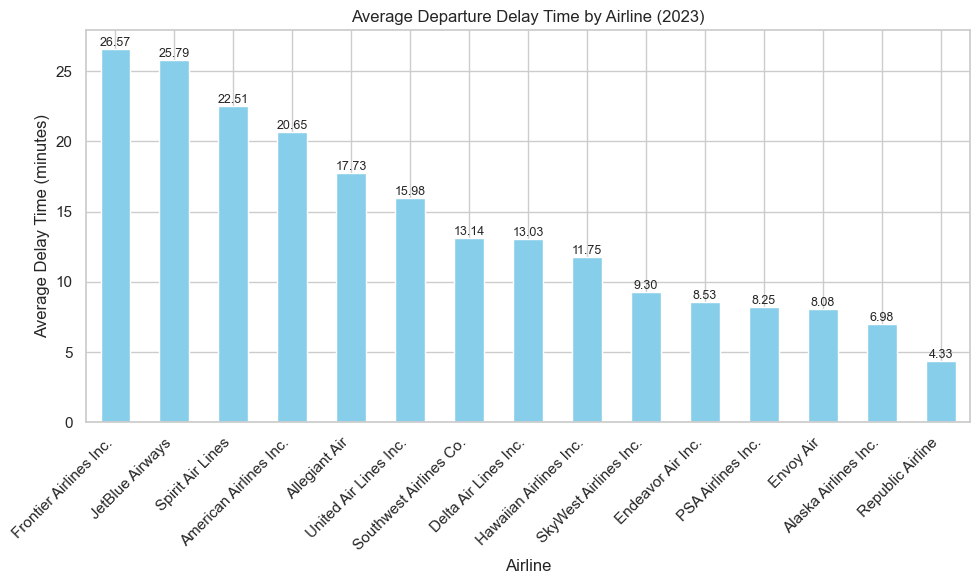

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ranked_airlines_by_delay.plot(kind='bar', color='skyblue')
plt.title('Average Departure Delay Time by Airline (2023)')
plt.xlabel('Airline')
plt.ylabel('Average Delay Time (minutes)')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with the exact delay value
for index, value in enumerate(ranked_airlines_by_delay):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

The data illustrates that Frontier Airlines Inc. has the highest average departure delay at approximately 26.57 minutes, suggesting potential operational challenges or systematic delays. Conversely, Republic Airline shows remarkable punctuality with the least average delay of around 4.33 minutes, indicating efficiency and timely service. The broad range in delay times across different airlines highlights the variability in on-time performance within the industry.

### Which city (as the departure origin) experiences the most/least average departure delay time?

In [16]:
# Calculate the average departure delay for each city
average_delay_by_city = df.groupby('Origin_City')['Departure_Delay'].mean()

# Sort the cities by average delay time to get the ranking from greatest to least
ranked_cities_by_delay = average_delay_by_city.sort_values(ascending=False)

# Display the city with the greatest average delay time
greatest_delay_city = ranked_cities_by_delay.idxmax()
greatest_delay_time = ranked_cities_by_delay.max()
print(f"City with the greatest average delay time: {greatest_delay_city} with an average of {greatest_delay_time:.2f} minutes.")

# Display the city with the least average delay time
least_delay_city = ranked_cities_by_delay.idxmin()
least_delay_time = ranked_cities_by_delay.min()
print(f"City with the least average delay time: {least_delay_city} with an average of {least_delay_time:.2f} minutes.")

City with the greatest average delay time: Santa Maria, CA with an average of 56.54 minutes.
City with the least average delay time: Kotzebue, AK with an average of -8.73 minutes.


### Ranking

In [17]:
# Display the ranking of cities from greatest to least average delay time
print("\nRanking of cities from greatest to least average delay time:")
print(ranked_cities_by_delay)


Ranking of cities from greatest to least average delay time:
Origin_City
Santa Maria, CA         56.536232
Pago Pago, TT           44.247191
Ashland, WV             35.122378
Sault Ste. Marie, MI    31.524416
Aguadilla, PR           30.346555
                          ...    
Gustavus, AK            -5.813333
Saipan, TT              -5.893130
Adak Island, AK         -7.738462
Deadhorse, AK           -8.199262
Kotzebue, AK            -8.730159
Name: Departure_Delay, Length: 343, dtype: float64


### Visualization

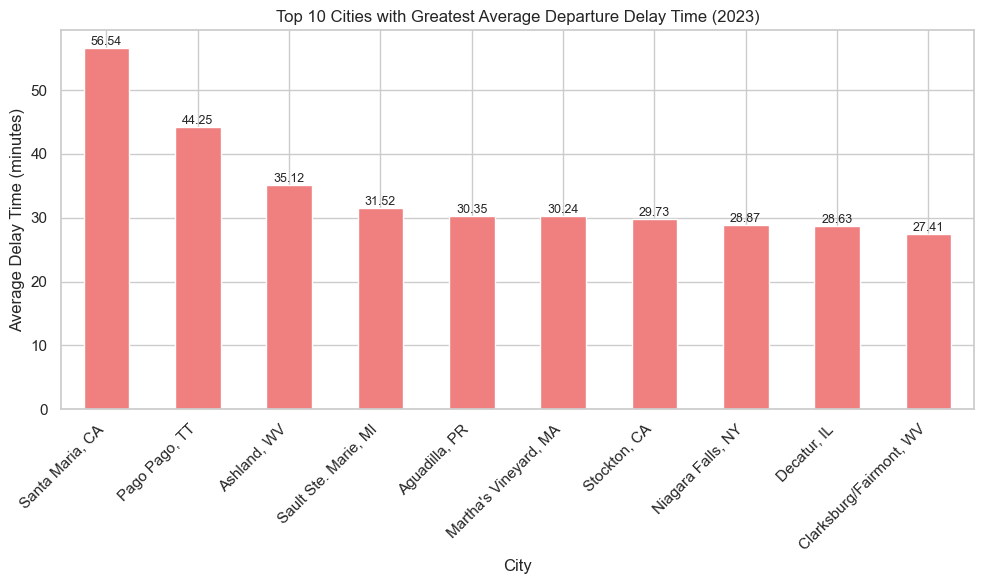

In [18]:
# Bar chart visualization for cities
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ranked_cities_by_delay.head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Cities with Greatest Average Departure Delay Time (2023)')
plt.xlabel('City')
plt.ylabel('Average Delay Time (minutes)')
plt.xticks(rotation=45, ha='right')

# Annotate each bar
for index, value in enumerate(ranked_cities_by_delay.head(10)):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=9)
    
plt.tight_layout()
plt.show()

The graph illustrates that the top 10 cities with the greatest average departure delay time in 2023 are primarily smaller cities, which might indicate less efficient airport operations or other local factors contributing to delays.

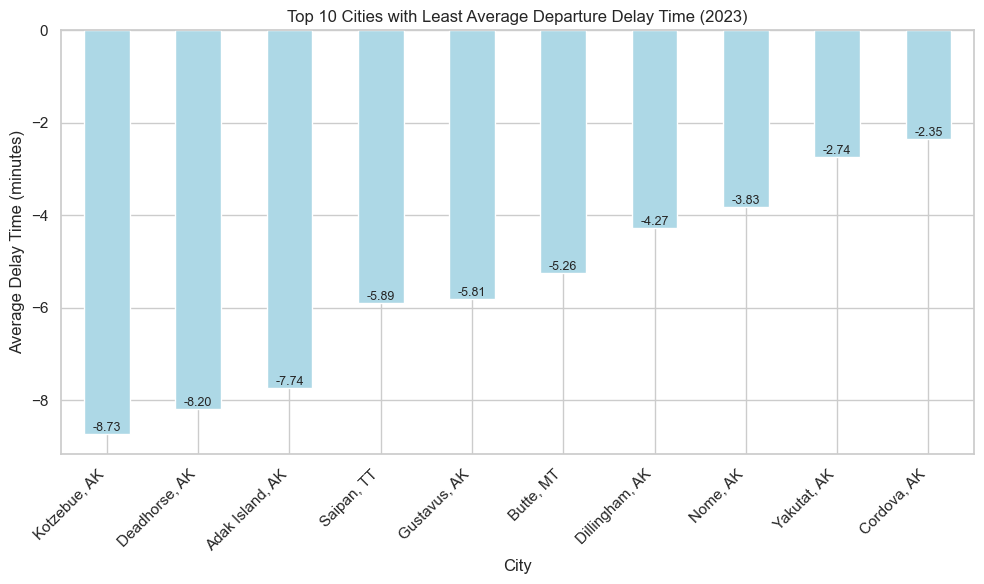

In [19]:
least_delay_cities = ranked_cities_by_delay.nsmallest(10).sort_values(ascending=True)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
least_delay_cities.plot(kind='bar', color='lightblue')
plt.title('Top 10 Cities with Least Average Departure Delay Time (2023)')
plt.xlabel('City')
plt.ylabel('Average Delay Time (minutes)')
plt.xticks(rotation=45, ha='right')

# Annotate each bar
for index, value in enumerate(least_delay_cities):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



The graph indicates that the top 10 cities with the least average departure delay time actually exhibit negative values, meaning flights tend to depart earlier than scheduled. This could be due to less air traffic and more efficient boarding and departure processes in these locations.

### Analyzing Average Departure Delay Time for the top 12 cities in the U.S.

### Ranking

In [20]:
# List of the top 12 biggest cities in America by population
top_12_cities = [
    "New York, NY", "Los Angeles, CA", "Chicago, IL", "Houston, TX",
    "Phoenix, AZ", "Philadelphia, PA", "San Antonio, TX", "San Diego, CA",
    "Dallas, TX", "Austin, TX", "Jacksonville, FL", "San Jose, CA",
]

# Calculate the average departure delay for each city in the DataFrame
average_delay_by_city = df.groupby('Origin_City')['Departure_Delay'].mean()

# Filter the results to include only the cities in the top 30 list
top_12_delays = average_delay_by_city[top_12_cities]

# Rank the cities by their average departure delay
ranked_top_12_delays = top_12_delays.sort_values(ascending=False)

print("Average departure delay time for the top 12 biggest cities in America:")
print(ranked_top_12_delays)


Average departure delay time for the top 12 biggest cities in America:
Origin_City
Jacksonville, FL    16.597308
Houston, TX         16.160341
New York, NY        14.832622
Chicago, IL         14.830242
Austin, TX          14.119022
Philadelphia, PA    14.057634
Dallas, TX          13.174174
Los Angeles, CA     13.091284
Phoenix, AZ         13.035149
San Diego, CA       11.852732
San Antonio, TX     11.513112
San Jose, CA         7.720404
Name: Departure_Delay, dtype: float64


### Visualization

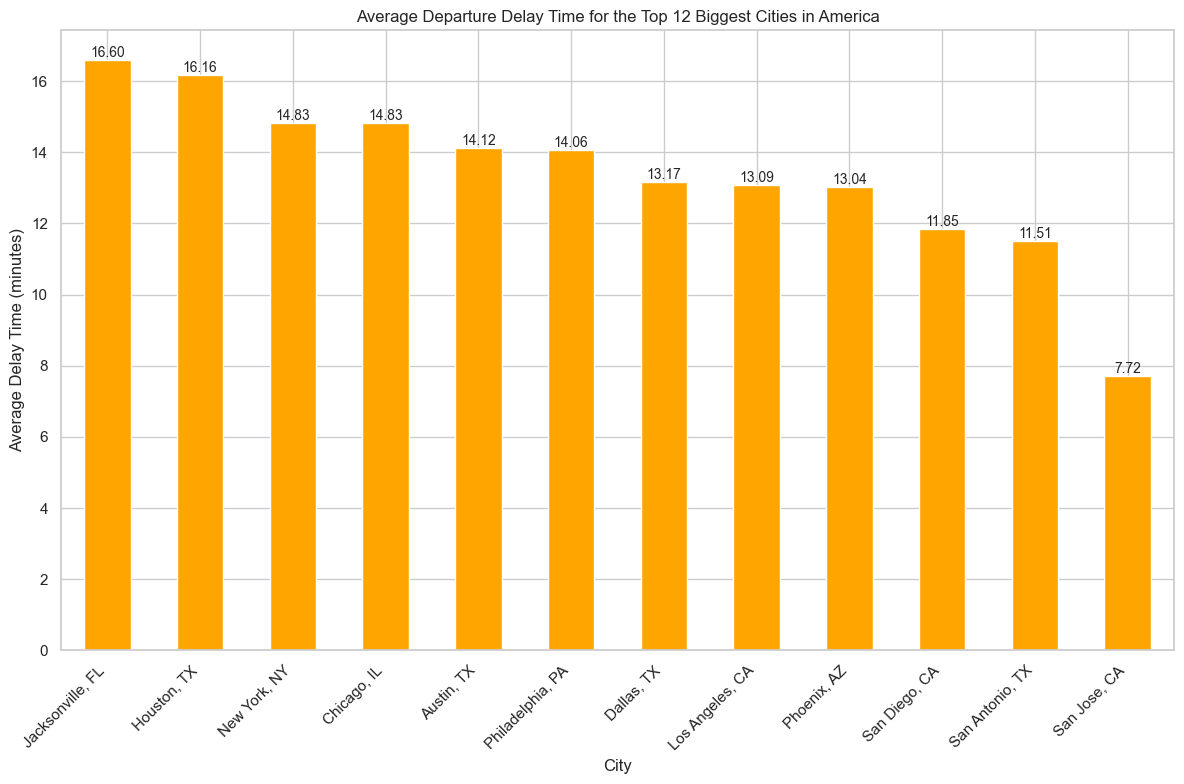

In [21]:
# Plotting a bar chart
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
ranked_top_12_delays.plot(kind='bar', color='orange')
plt.title('Average Departure Delay Time for the Top 12 Biggest Cities in America')
plt.xlabel('City')
plt.ylabel('Average Delay Time (minutes)')
plt.xticks(rotation=45, ha='right')

# Annotate each bar
for index, value in enumerate(ranked_top_12_delays):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


The data indicates that Jacksonville, FL, and Houston, TX, experience the highest average departure delays among the top 12 U.S. cities, exceeding 16 minutes. Cities like New York and Chicago also face considerable delays, close to 15 minutes, likely due to heavy air traffic. Mid-range delays (13-14 minutes) are seen in Austin, Philadelphia, Dallas, Los Angeles, and Phoenix. San Diego and San Antonio experience slightly lower delays, while San Jose, CA, has the least average delay, at just over 7 minutes, suggesting more efficient airport operations or less congestion. Overall, these figures highlight the variation in airport efficiency and the impact of local factors on flight punctuality.

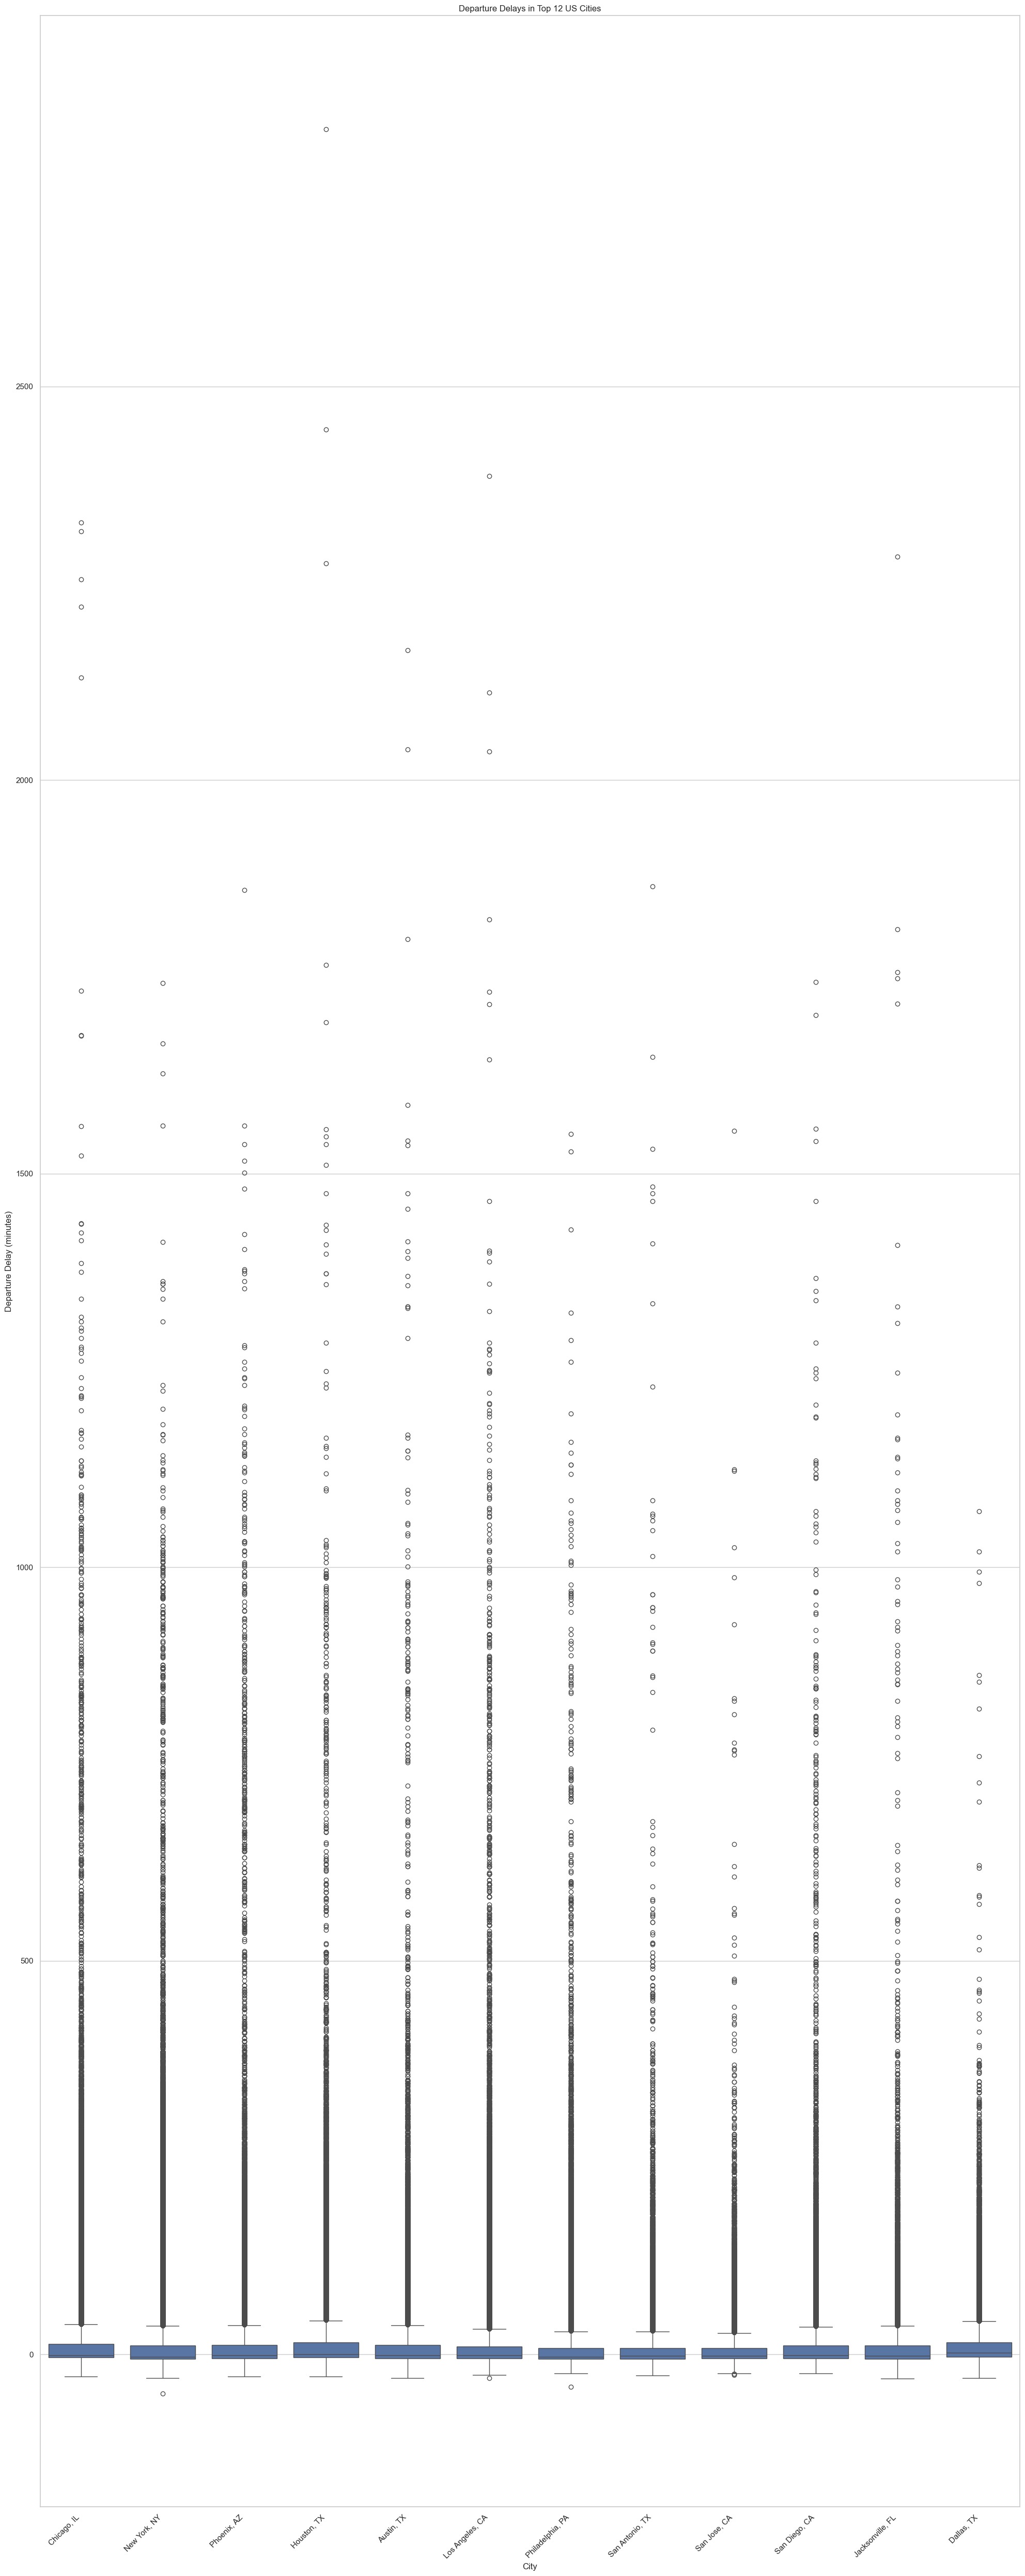

In [22]:
#Plotting a box plot for distribution
# Filter the DataFrame to include only flights originating from the top 12 cities
filtered_df = df[df['Origin_City'].isin(top_12_cities)]

plt.figure(figsize=(20, 50))
sns.set(style="whitegrid")
sns.boxplot(x='Origin_City', y='Departure_Delay', data=filtered_df)
plt.xticks(rotation=45, ha='right')
plt.title('Departure Delays in Top 12 US Cities')
plt.xlabel('City')
plt.ylabel('Departure Delay (minutes)')
plt.tight_layout()
plt.show()



The central tendency (median, quartiles) of the box plot is not as prominent as the outliers. This indicates that most flights might be on time or have minor delays, but a few flights have very long delays, which skews the visualization.

### Which airport is most/least affected by delays?

In [23]:
# Groupby the airport origin code ('Origin') and calculate the mean delay
average_delay_by_airport = df.groupby('Origin')['Departure_Delay'].mean()

# Find the airport with the maximum and minimum average delay
most_delayed_airport = average_delay_by_airport.idxmax()
most_delayed_avg_delay = average_delay_by_airport.max()
least_delayed_airport = average_delay_by_airport.idxmin()
least_delayed_avg_delay = average_delay_by_airport.min()

print(f"The airport most affected by delays is {most_delayed_airport} with an average delay of {most_delayed_avg_delay:.2f} minutes.")
print(f"The airport least affected by delays is {least_delayed_airport} with an average delay of {least_delayed_avg_delay:.2f} minutes.")

The airport most affected by delays is SMX with an average delay of 56.54 minutes.
The airport least affected by delays is OTZ with an average delay of -8.73 minutes.


Sidenote: SMX stands for St. Michael international Airport, and OTZ stands for Ralph Wien Memorial Airport.

### Ranking

In [24]:
# Sort the average delays by airport to get a ranking from most to least
ranked_airports_by_delay = average_delay_by_airport.sort_values(ascending=False)

print("\nRanking of airports from most to least affected by delays:")
print(ranked_airports_by_delay)


Ranking of airports from most to least affected by delays:
Origin
SMX    56.536232
PPG    44.247191
HTS    35.122378
CIU    31.524416
BQN    30.346555
         ...    
GST    -5.813333
SPN    -5.893130
ADK    -7.738462
SCC    -8.199262
OTZ    -8.730159
Name: Departure_Delay, Length: 349, dtype: float64


### Visualization

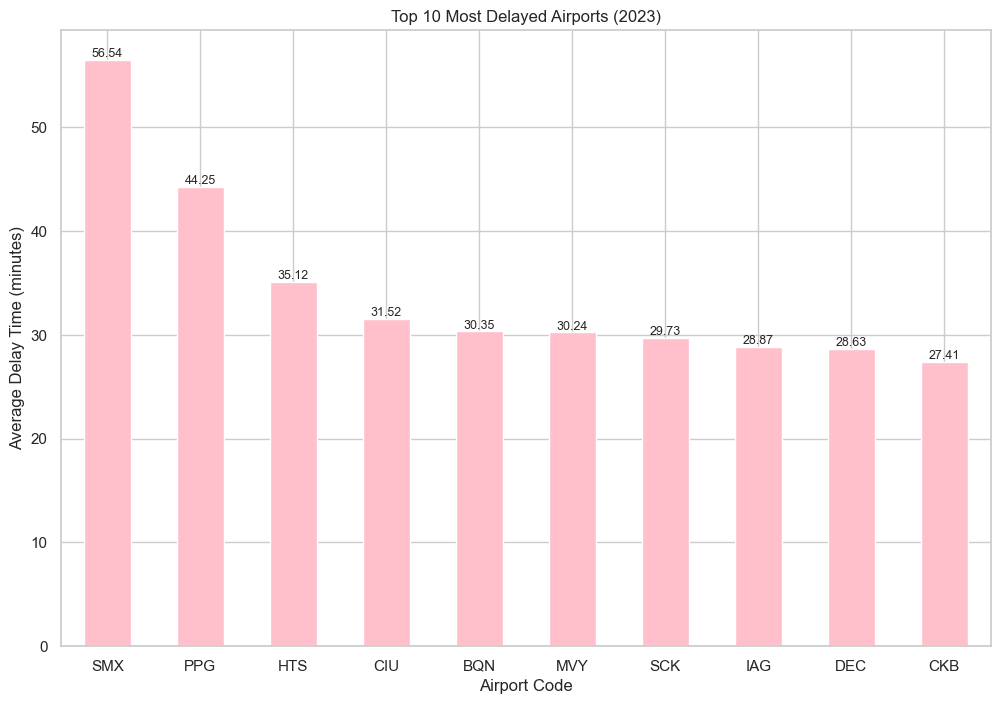

In [25]:
# Plotting a bar chart
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
ranked_airports_by_delay.head(10).plot(kind='bar', color='pink')
plt.title('Top 10 Most Delayed Airports (2023)')
plt.xlabel('Airport Code')
plt.ylabel('Average Delay Time (minutes)')
plt.xticks(rotation=0, ha='center')

# Annotate each bar
for index, value in enumerate(ranked_airports_by_delay.head(10)):  # Make sure to limit the enumeration to the top 10
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

plt.show()


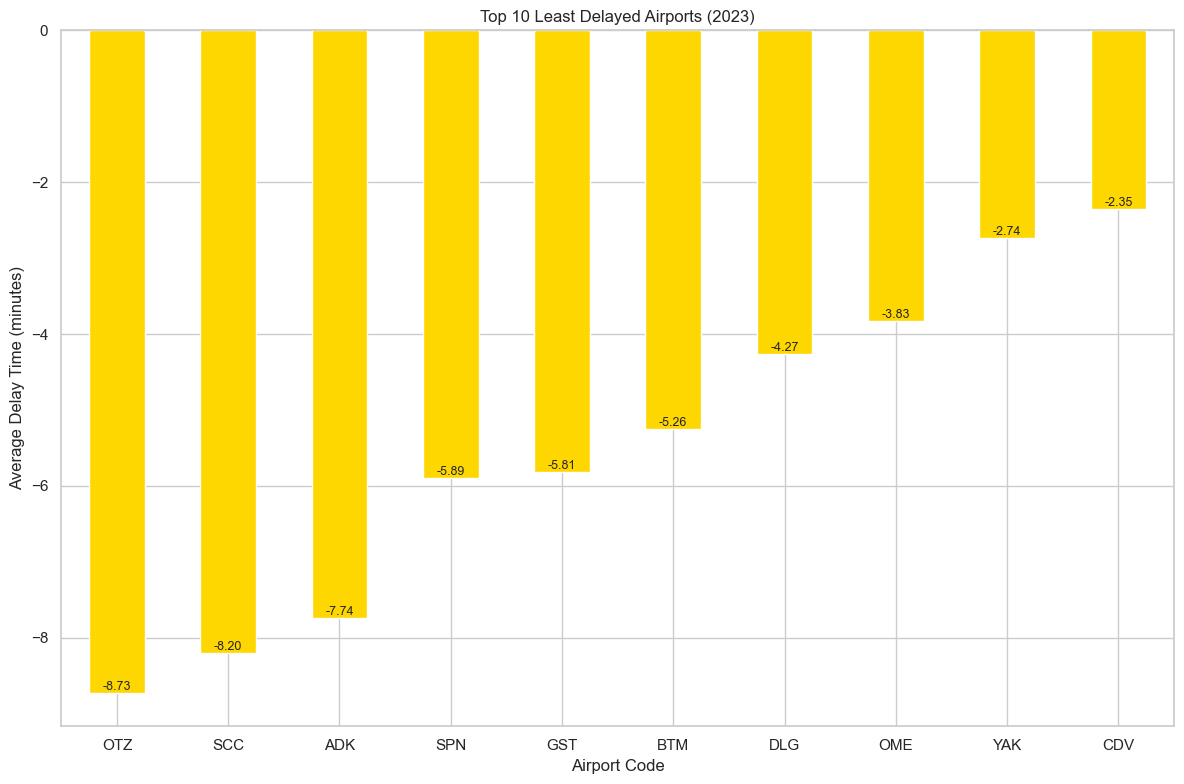

In [26]:
least_delayed_airports = ranked_airports_by_delay.nsmallest(10)

# Plotting a bar chart
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
bars = least_delayed_airports.plot(kind='bar', color='gold')
plt.title('Top 10 Least Delayed Airports (2023)')
plt.xlabel('Airport Code')
plt.ylabel('Average Delay Time (minutes)')
plt.xticks(rotation=0, ha='center')

# Annotate each bar
for index, value in enumerate(least_delayed_airports):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


### Comparing the average departure delay time for the three airports in New York: JFK, EWR , & LGA.

In [27]:
# Filter the DataFrame for flights originating from the three New York airports
ny_airports = ['JFK', 'EWR', 'LGA']
ny_airport_delays = df[df['Origin'].isin(ny_airports)]

# Calculate the average departure delay for each of the New York airports
average_delay_by_ny_airport = ny_airport_delays.groupby('Origin')['Departure_Delay'].mean()

# Sort the airports by average delay time
sorted_ny_delays = average_delay_by_ny_airport.sort_values(ascending=False)
sorted_ny_delays

Origin
EWR    18.962121
JFK    17.706245
LGA    12.475101
Name: Departure_Delay, dtype: float64

### Visualization

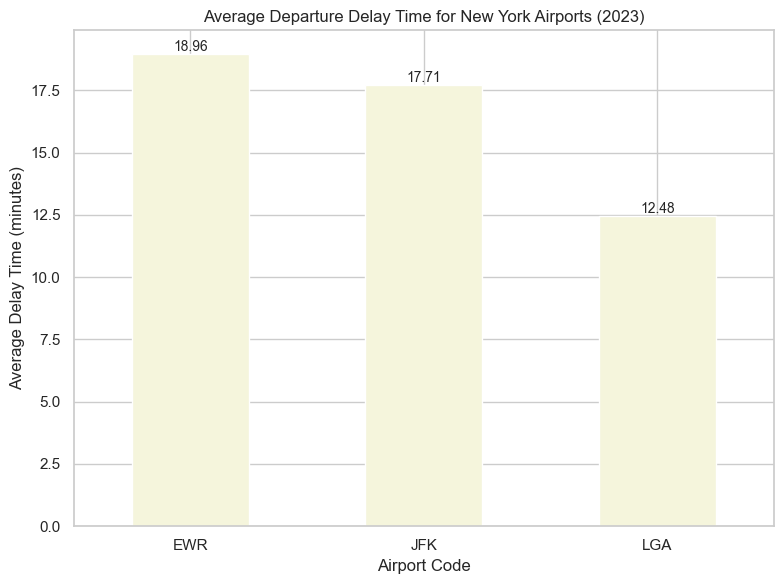

In [28]:
# Create a bar chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
bars = sorted_ny_delays.plot(kind='bar', color='beige')
plt.title('Average Departure Delay Time for New York Airports (2023)')
plt.xlabel('Airport Code')
plt.ylabel('Average Delay Time (minutes)')
plt.xticks(rotation=0)

# Annotate each bar
for index, value in enumerate(sorted_ny_delays):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Among the three major airports in New York, Newark Liberty International Airport (EWR) has the highest average departure delay time at approximately 18.96 minutes. This is followed by John F. Kennedy International Airport (JFK) with an average delay of about 17.71 minutes. LaGuardia Airport (LGA) has the least average departure delay time of the three, at around 12.48 minutes.
For passengers traveling from New York, it is advisable to anticipate longer wait times at EWR and JFK, while LGA could potentially offer the quickest departures on average.

### Which time period of a day is the most susceptible to significant delays? (We look at local departure time)
### 1. 6am - 12pm
### 2. 12pm - 6pm
### 3. 6pm - 12am
### 4. 12am - 6am

In [29]:
# Convert Departure_Time to a 4-digit format
df.loc[:, 'Departure_Time'] = df['Departure_Time'].apply(lambda x: '{:04d}'.format(int(x)))
df

,Date,Airline,Origin,Origin_City,Destination,Scheduled_Departure,Departure_Time,Departure_Delay,Scheduled_Arrival,Arrival_Time,Arrival_Delay,Schedule_Time,Elapsed_Time
0,2023-01-01,United Air Lines Inc.,EWR,"Newark, NJ",ORD,859,0904,5.0,1048,1046.0,-2.0,169.0,162.0
1,2023-01-01,American Airlines Inc.,DFW,"Dallas/Fort Worth, TX",MIA,1040,1045,5.0,1431,1423.0,-8.0,171.0,158.0
2,2023-01-01,Southwest Airlines Co.,MDW,"Chicago, IL",DEN,1525,1556,31.0,1710,1740.0,30.0,165.0,164.0
3,2023-01-01,Southwest Airlines Co.,MDW,"Chicago, IL",DEN,1800,1840,40.0,1945,2012.0,27.0,165.0,152.0
4,2023-01-01,American Airlines Inc.,ATL,"Atlanta, GA",PHL,730,0721,-9.0,932,910.0,-22.0,122.0,109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545417,2023-08-31,Allegiant Air,MFE,"Mission/McAllen/Edinburg, TX",LAS,1353,1358,5.0,1453,1455.0,2.0,180.0,177.0
4545418,2023-08-31,Allegiant Air,SNA,"Santa Ana, CA",GEG,1326,1413,47.0,1556,1641.0,45.0,150.0,148.0
4545419,2023-08-31,Allegiant Air,LAS,"Las Vegas, NV",FSD,1717,1706,-11.0,2203,2156.0,-7.0,166.0,170.0
4545420,2023-08-31,Allegiant Air,GRI,"Grand Island, NE",LAS,2314,1312,838.0,2344,1355.0,851.0,150.0,163.0


### Ranking

In [30]:
# Function to categorize the time of day
def categorize_time_of_day(dep_time):
    dep_time = int(dep_time)
    if 600 <= dep_time < 1200:
        return '6am - 12pm'
    elif 1200 <= dep_time < 1800:
        return '12pm - 6pm'
    elif 1800 <= dep_time < 2400:
        return '6pm - 12am'
    else:
        return '12am - 6am'

# Apply the function to categorize departure times
df.loc[:, 'Time_of_Day'] = df['Departure_Time'].apply(categorize_time_of_day)

# Calculate the average departure delay for each time of day
average_delay_by_time_of_day = df.groupby('Time_of_Day')['Departure_Delay'].mean()

# Sort the results from highest to lowest average delay
sorted_delays = average_delay_by_time_of_day.sort_values(ascending=False)

print(sorted_delays)

Time_of_Day
6pm - 12am    26.236443
12pm - 6pm    14.182517
12am - 6am    13.602194
6am - 12pm     6.542190
Name: Departure_Delay, dtype: float64


/var/folders/8y/fqf5d9yj56s5bxcc8q4t_80c0000gn/T/ipykernel_20836/1532335123.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Time_of_Day'] = df['Departure_Time'].apply(categorize_time_of_day)


### Visualization

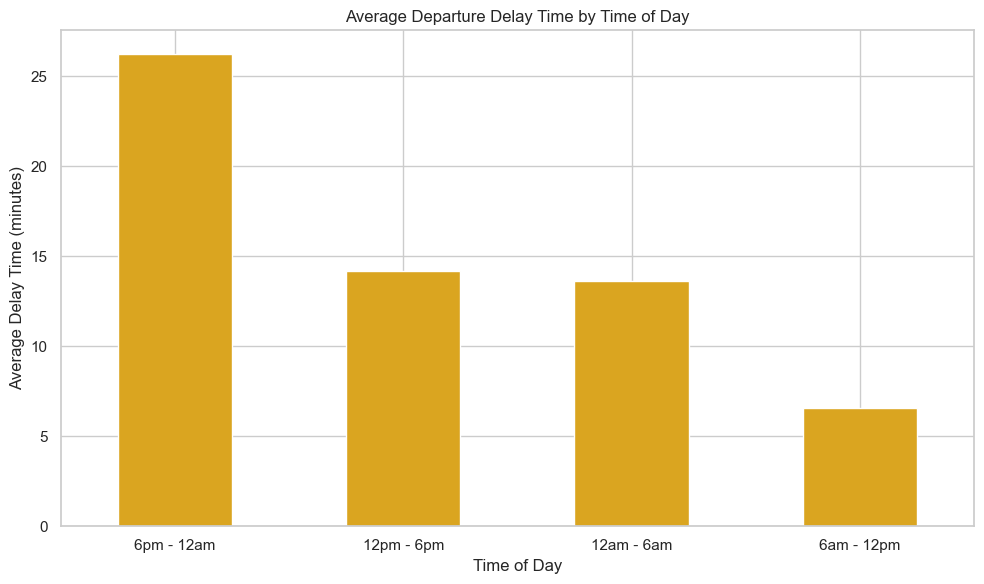

In [31]:
# Create a bar chart
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sorted_delays.plot(kind='bar', color='goldenrod')
plt.title('Average Departure Delay Time by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Delay Time (minutes)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The data indicates that the highest average departure delays occur in the evening and night (6pm - 12am), suggesting that factors such as air traffic congestion and the accumulation of delays throughout the day impact flight departures most during these hours. Morning flights (6am - 12pm) experience the least average delay, likely due to fewer operational disruptions at the start of the day. Overall, the data indicates that flights later in the day are more prone to experience longer delays. These insights can inform travel planning and operational strategies to mitigate delays.